In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('fruit_data.csv')
print(df)


    fruit_label fruit_name     fruit_subtype  mass  width  height  color_score
0             1      apple      granny_smith   192    8.4     7.3         0.55
1             1      apple      granny_smith   180    8.0     6.8         0.59
2             1      apple      granny_smith   176    7.4     7.2         0.60
3             2   mandarin          mandarin    86    6.2     4.7         0.80
4             2   mandarin          mandarin    84    6.0     4.6         0.79
5             2   mandarin          mandarin    80    5.8     4.3         0.77
6             2   mandarin          mandarin    80    5.9     4.3         0.81
7             2   mandarin          mandarin    76    5.8     4.0         0.81
8             1      apple          braeburn   178    7.1     7.8         0.92
9             1      apple          braeburn   172    7.4     7.0         0.89
10            1      apple          braeburn   166    6.9     7.3         0.93
11            1      apple          braeburn   172  

In [2]:
df.shape
cols=df.columns
print(cols)
df.value_counts("fruit_name")

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')


fruit_name
orange      19
apple       19
lemon       16
mandarin     5
dtype: int64

In [6]:
y = df['fruit_name']

In [7]:
df.drop('fruit_name', axis = 1,inplace = True)

In [8]:
df.drop('fruit_label', axis = 1,inplace=True)
cols=df.columns
print(cols)

Index(['fruit_subtype', 'mass', 'width', 'height', 'color_score'], dtype='object')


In [9]:
x=df

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder_x= LabelEncoder()
x['fruit_subtype']= label_encoder_x.fit_transform(x['fruit_subtype'])
print(x)


    fruit_subtype  mass  width  height  color_score
0               3   192    8.4     7.3         0.55
1               3   180    8.0     6.8         0.59
2               3   176    7.4     7.2         0.60
3               4    86    6.2     4.7         0.80
4               4    84    6.0     4.6         0.79
5               4    80    5.8     4.3         0.77
6               4    80    5.9     4.3         0.81
7               4    76    5.8     4.0         0.81
8               0   178    7.1     7.8         0.92
9               0   172    7.4     7.0         0.89
10              0   166    6.9     7.3         0.93
11              0   172    7.1     7.6         0.92
12              0   154    7.0     7.1         0.88
13              2   164    7.3     7.7         0.70
14              2   152    7.6     7.3         0.69
15              2   156    7.7     7.1         0.69
16              2   156    7.6     7.5         0.67
17              2   168    7.5     7.6         0.73
18          

In [18]:
df.describe()

,fruit_subtype,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,5.118644,163.118644,7.105085,7.693220,0.762881
std,3.079883,55.018832,0.816938,1.361017,0.076857
min,0.000000,76.000000,5.800000,4.000000,0.550000
25%,2.000000,140.000000,6.600000,7.200000,0.720000
50%,5.000000,158.000000,7.200000,7.600000,0.750000
75%,8.000000,177.000000,7.500000,8.200000,0.810000
max,9.000000,362.000000,9.600000,10.500000,0.930000


In [19]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0) 

In [20]:
from sklearn.preprocessing import MinMaxScaler    
st_x= MinMaxScaler()    
x_train= st_x.fit_transform(x_train) 
x_test=st_x.fit_transform(x_test)
print(x_train)

[[0.88888889 0.27857143 0.41176471 0.49230769 0.72972973]
 [0.66666667 0.35       0.44117647 0.93846154 0.45945946]
 [0.44444444 0.         0.         0.         0.7027027 ]
 [0.22222222 0.27142857 0.52941176 0.50769231 0.37837838]
 [0.55555556 0.31428571 0.41176471 0.46153846 0.67567568]
 [1.         0.2        0.         0.72307692 0.48648649]
 [0.55555556 0.3        0.35294118 0.52307692 0.7027027 ]
 [0.88888889 0.27857143 0.44117647 0.50769231 0.64864865]
 [1.         0.14285714 0.02941176 0.63076923 0.48648649]
 [0.11111111 0.30714286 0.5        0.47692308 0.75675676]
 [1.         0.14285714 0.14705882 0.56923077 0.45945946]
 [0.55555556 0.45714286 0.5        0.8        0.59459459]
 [0.22222222 0.28571429 0.55882353 0.47692308 0.37837838]
 [0.44444444 0.01428571 0.         0.04615385 0.59459459]
 [0.55555556 0.47857143 0.58823529 0.61538462 0.72972973]
 [0.22222222 0.28571429 0.52941176 0.53846154 0.32432432]
 [1.         0.19285714 0.05882353 0.64615385 0.43243243]
 [0.11111111 0

In [21]:
from sklearn.neighbors import KNeighborsClassifier 
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [22]:
y_pred= classifier.predict(x_test)  
print(y_pred)

['orange' 'orange' 'lemon' 'orange' 'apple' 'apple' 'orange' 'lemon'
 'orange' 'apple' 'mandarin' 'apple' 'orange' 'orange' 'orange']


In [23]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix (y_test, y_pred,labels=classifier.classes_)  
print(cm)

[[4 0 0 0]
 [0 2 0 0]
 [0 0 1 0]
 [0 0 0 8]]


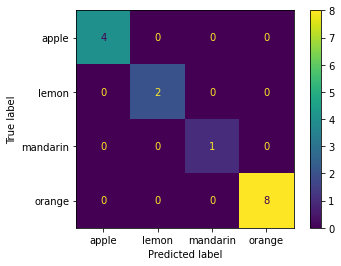

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()

In [25]:
training_score = classifier.score(x_train, y_train)
test_score = classifier.score(x_test, y_test)
print(training_score)
print(test_score)

0.9772727272727273
1.0


In [26]:
K = []
training = []
test = []
scores = {}
  
for k in range(2, 22):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(x_train, y_train)
  
    training_score = clf.score(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

In [27]:
for keys, values in scores.items():
    print(keys, ':', values)

2 : [0.9772727272727273, 0.9333333333333333]
3 : [0.9772727272727273, 0.9333333333333333]
4 : [0.9772727272727273, 0.9333333333333333]
5 : [0.9772727272727273, 1.0]
6 : [0.9772727272727273, 0.9333333333333333]
7 : [0.9772727272727273, 0.9333333333333333]
8 : [0.9318181818181818, 0.8666666666666667]
9 : [0.9545454545454546, 0.9333333333333333]
10 : [0.9545454545454546, 0.6]
11 : [0.8863636363636364, 0.6]
12 : [0.8409090909090909, 0.5333333333333333]
13 : [0.8181818181818182, 0.5333333333333333]
14 : [0.75, 0.5333333333333333]
15 : [0.75, 0.5333333333333333]
16 : [0.7272727272727273, 0.5333333333333333]
17 : [0.7272727272727273, 0.5333333333333333]
18 : [0.7045454545454546, 0.5333333333333333]
19 : [0.7045454545454546, 0.5333333333333333]
20 : [0.7272727272727273, 0.4666666666666667]
21 : [0.7045454545454546, 0.4666666666666667]


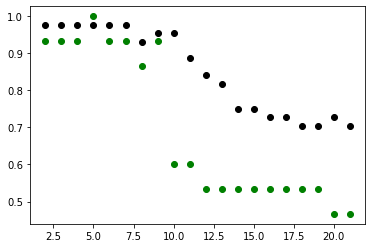

In [28]:
import matplotlib.pyplot as plt
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()